# Plot generation

This notebook reads the result files and generates plots. 

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.float_format', lambda x: "{:0.1e}".format(x))

In [2]:
df = pd.read_csv('results/results.csv', delimiter  = ',', index_col = 'Methods')

In [3]:
labels = ['qDRIFT', 'Rand. Hamilt.', "Taylor naive", "Taylor on-the-fly", "Config. interaction",
        "Low depth Trotter", "SHC Trotter" "L. d. Taylor naive", "L. d. Tay. on-the-fly", "Linear T", "Sparsity low-rank", 
        "Interaction picture"]
print(df.index)
df.index = labels
#df.index.name = 'Methods'
df

Index(['qdrift', 'rand_ham', 'taylor_naive', 'taylor_on_the_fly',
       'configuration_interaction', 'low_depth_trotter', 'low_depth_taylor',
       'low_depth_taylor_on_the_fly', 'linear_t', 'sparsity_low_rank',
       'interaction_picture'],
      dtype='object', name='Methods')


,h2,hydrofluoric acid,water,ammonia,methane,O2,CO2,NaCl
qDRIFT,7.6e+21,1.3e+24,1.6e+24,2.7e+24,4.4e+24,5.6e+24,2.8e+25,4.4e+25
Rand. Hamilt.,1.8e+19,3.1e+24,1.4e+25,8.5e+25,1.1e+26,1.4e+25,9.4e+26,4.3e+28
Taylor naive,2.6e+13,1.2e+17,1.3e+17,1.6e+17,3.7e+18,4.4e+18,9.7e+18,1.2e+19
Taylor on-the-fly,1.2e+27,5.2e+29,8.1e+29,3.0e+29,6.1e+30,4.0e+31,2.7e+33,4.3e+33
Config. interaction,1.7e+36,2.4e+39,2.8e+39,3.8e+38,3.7e+39,8.3e+40,2.5e+43,1.5e+46
Low depth Trotter,5.1e+22,5.3e+25,4.7e+25,2.2e+25,3.7e+25,1.9e+26,3.6e+26,2.9e+27
L. d. Taylor naive,8.9e+11,7.1e+12,5.2e+12,2.8e+12,3.4e+12,6.1e+12,3.7e+12,1.8e+13
L. d. Tay. on-the-fly,1.2e+23,2.5e+25,4.2e+25,3.4e+25,7.6e+25,9.6e+25,4.7e+26,7.5e+26
Linear T,9.5e+13,2.5e+15,2.8e+15,1.6e+15,2.5e+15,3.8e+15,6.2e+15,1.5e+16
Sparsity low-rank,3.2e+10,1.2e+12,1.5e+12,2.6e+12,4.5e+12,3.8e+12,1.6e+13,1.3e+13


In [4]:
df.columns = [r'H$_2$', 'HF', r'H$_2$O', r'NH$_3$', r'CH$_4$', r'O$_2$', r'CO$_2$', 'NaCl']
latex_code = df.to_latex(caption='T-gate cost estimates for different molecules and methods obtained using our library', 
                label= 'tab:costs', escape=False, column_format = '|l'+'|p{1.55cm}'*8+'|')
#latex_code = latex_code.replace("\\\n", "\\ \hline\n")
print(latex_code)

\begin{table}
\centering
\caption{T-gate cost estimates for different molecules and methods obtained using our library}
\label{tab:costs}
\begin{tabular}{|l|p{1.55cm}|p{1.55cm}|p{1.55cm}|p{1.55cm}|p{1.55cm}|p{1.55cm}|p{1.55cm}|p{1.55cm}|}
\toprule
{} &   H$_2$ &      HF &  H$_2$O &  NH$_3$ &  CH$_4$ &   O$_2$ &  CO$_2$ &    NaCl \\
\midrule
qDRIFT                & 7.6e+21 & 1.3e+24 & 1.6e+24 & 2.7e+24 & 4.4e+24 & 5.6e+24 & 2.8e+25 & 4.4e+25 \\
Rand. Hamilt.         & 1.8e+19 & 3.1e+24 & 1.4e+25 & 8.5e+25 & 1.1e+26 & 1.4e+25 & 9.4e+26 & 4.3e+28 \\
Taylor naive          & 2.6e+13 & 1.2e+17 & 1.3e+17 & 1.6e+17 & 3.7e+18 & 4.4e+18 & 9.7e+18 & 1.2e+19 \\
Taylor on-the-fly     & 1.2e+27 & 5.2e+29 & 8.1e+29 & 3.0e+29 & 6.1e+30 & 4.0e+31 & 2.7e+33 & 4.3e+33 \\
Config. interaction   & 1.7e+36 & 2.4e+39 & 2.8e+39 & 3.8e+38 & 3.7e+39 & 8.3e+40 & 2.5e+43 & 1.5e+46 \\
Low depth Trotter     & 5.1e+22 & 5.3e+25 & 4.7e+25 & 2.2e+25 & 3.7e+25 & 1.9e+26 & 3.6e+26 & 2.9e+27 \\
L. d. Taylor naive    & 8.9

In [5]:
'''
norm_factors = {}
for col in df.columns:
    div = 10**int(np.log10(df[col]['hydrofluoric acid']))
    norm_factors[col] = div
    #df[str(col) + '_normal'] = df[col]/div

data = [df[col] for col in df.columns if '_normal' in str(col)]
headers = [col[:-7] for col in df.columns if '_normal' in str(col)]
print(headers)
df_normal = pd.concat(data, axis=1, keys=headers)
df_normal'''

"\nnorm_factors = {}\nfor col in df.columns:\n    div = 10**int(np.log10(df[col]['hydrofluoric acid']))\n    norm_factors[col] = div\n    #df[str(col) + '_normal'] = df[col]/div\n\ndata = [df[col] for col in df.columns if '_normal' in str(col)]\nheaders = [col[:-7] for col in df.columns if '_normal' in str(col)]\nprint(headers)\ndf_normal = pd.concat(data, axis=1, keys=headers)\ndf_normal"

In [6]:
df.columns

Index(['H$_2$', 'HF', 'H$_2$O', 'NH$_3$', 'CH$_4$', 'O$_2$', 'CO$_2$', 'NaCl'], dtype='object')

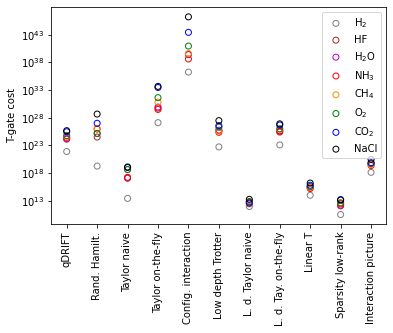

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

#plt.xlabel("Molecule")
plt.ylabel("T-gate cost")
plt.yscale('log')
plt.xticks(ticks = range(len(labels)), labels = labels, rotation=90)
#plt.legend(loc='upper left')

# Function add a legend  
#plt.legend(list(df.columns), loc='upper left')

for col,color in zip(df.columns, ['gray','brown','m','red','darkorange', 'green','blue', 'black']):
    ax.scatter(df.index, df[col], label = col,facecolors="None", edgecolors=color, linewidth = 1)

ax.legend(bbox_to_anchor=(1, 1))

plt.savefig('results/cost_plot.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [8]:
df2 = df.T
df2.columns

Index(['qDRIFT', 'Rand. Hamilt.', 'Taylor naive', 'Taylor on-the-fly',
       'Config. interaction', 'Low depth Trotter', 'L. d. Taylor naive',
       'L. d. Tay. on-the-fly', 'Linear T', 'Sparsity low-rank',
       'Interaction picture'],
      dtype='object')

In [9]:
df2 = df2[['Taylor naive', 'Taylor on-the-fly', 'L. d. Taylor naive', 'L. d. Tay. on-the-fly']].copy()


In [10]:
df2.index

Index(['H$_2$', 'HF', 'H$_2$O', 'NH$_3$', 'CH$_4$', 'O$_2$', 'CO$_2$', 'NaCl'], dtype='object')

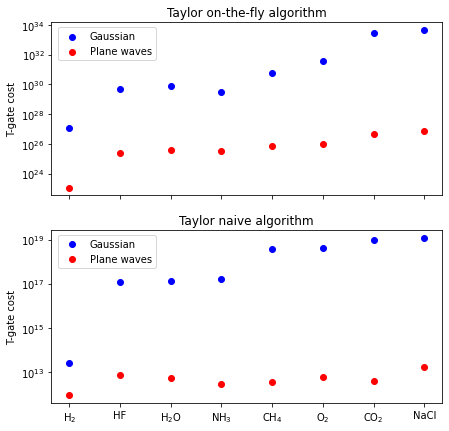

In [11]:
fig, (ax2, ax1) = plt.subplots(2, 1, sharex=True,figsize=(7,7))
ax1.scatter(df2.index, df2['Taylor naive'], c = 'blue', label = 'Gaussian')
ax1.scatter(df2.index, df2['L. d. Taylor naive'], c = 'red', label = 'Plane waves')
ax1.set_title('Taylor naive algorithm')
ax1.set_yscale('log')
ax1.set_ylabel('T-gate cost')
ax1.legend(bbox_to_anchor=(0.28, 1))

ax2.scatter(df2.index, df2['Taylor on-the-fly'], c = 'blue', label = 'Gaussian')
ax2.scatter(df2.index, df2['L. d. Tay. on-the-fly'], c = 'red', label = 'Plane waves')
ax2.set_title('Taylor on-the-fly algorithm')
ax2.legend(bbox_to_anchor=(0.28, 1))
ax2.set_yscale('log')
ax2.set_ylabel('T-gate cost')

plt.savefig('results/gaussian_vs_plane.pdf', format='pdf', bbox_inches='tight')
plt.show()